In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('http://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train

array([[-0.63809212, -0.87178849, -0.65116137, ..., -0.58025228,
         0.77120442, -0.23541097],
       [ 0.42091356, -0.04066218,  0.58337983, ...,  1.4823845 ,
         2.13563449,  1.23379077],
       [-0.29638629,  1.36317302, -0.35839289, ..., -0.82488779,
        -0.7019389 , -0.88331982],
       ...,
       [-0.76799682, -1.15348677, -0.74533864, ..., -0.68760923,
        -0.88312765, -0.11563909],
       [ 2.55022099,  1.69376108,  2.7044158 , ...,  2.38153655,
         0.48602908,  0.24253587],
       [-0.77646886,  1.05586582, -0.75066171, ..., -0.27637497,
        -1.22502294,  0.2254256 ]])

In [9]:
y_train

,diagnosis
84,B
351,M
457,B
530,B
460,M
...,...
550,B
88,B
540,B
202,M


In [10]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [11]:
y_train

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,

In [12]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [13]:
X_train_tensor = X_train_tensor.float()
X_test_tensor = X_test_tensor.float()
y_train_tensor = y_train_tensor.float()
y_test_tensor = y_test_tensor.float()

In [14]:
X_train_tensor.shape

torch.Size([455, 30])

In [15]:
y_train_tensor.shape

torch.Size([455])

<h2> Defining The Neural Network </h2>

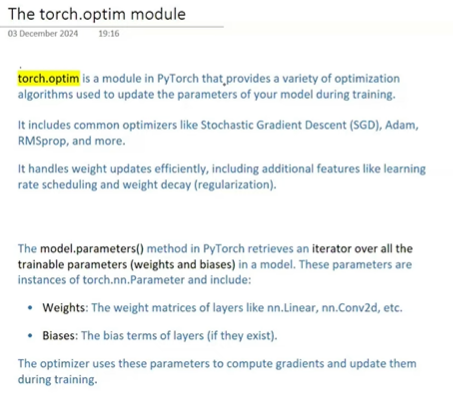

In [17]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = features
    self.labels = labels

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self, index):
    return self.features[index], self.labels[index]



In [19]:
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

In [20]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
train_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [22]:
class MySimpleNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()

    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):
    out = self.linear(features)
    out = self.sigmoid(out)
    return out

<h2> Important Parameters </h2>

In [23]:
learning_rate = 0.1
epochs = 25

In [24]:
model = MySimpleNN(X_train_tensor.shape[1])

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss_function = nn.BCELoss()

<h2> Training Pipeline </h2>

In [25]:
# # define loop
# for epoch in range(epochs):
#   y_pred = model(X_train_tensor)
#   loss = loss_function(y_pred, y_train_tensor.view(-1, 1))
#   optimizer.zero_grad()
#   loss.backward()
#   optimizer.step()

#   print(f'Epoch: {epoch+1}, Loss: {loss.item()}')

for epoch in range(epochs):

  for batch_features, batch_labels in train_loader:
    y_pred = model(batch_features)
    loss = loss_function(y_pred, batch_labels.view(-1, 1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch: {epoch+1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.41769498586654663
Epoch: 2, Loss: 0.31535351276397705
Epoch: 3, Loss: 0.11433431506156921
Epoch: 4, Loss: 0.27279481291770935
Epoch: 5, Loss: 0.16749484837055206
Epoch: 6, Loss: 0.1416667252779007
Epoch: 7, Loss: 0.16707517206668854
Epoch: 8, Loss: 0.12894849479198456
Epoch: 9, Loss: 0.20595186948776245
Epoch: 10, Loss: 0.12256672978401184
Epoch: 11, Loss: 0.22597084939479828
Epoch: 12, Loss: 0.09749069809913635
Epoch: 13, Loss: 0.1302134394645691
Epoch: 14, Loss: 0.16462932527065277
Epoch: 15, Loss: 0.10840614885091782
Epoch: 16, Loss: 0.13269738852977753
Epoch: 17, Loss: 0.03911290690302849
Epoch: 18, Loss: 0.08736087381839752
Epoch: 19, Loss: 0.10343653708696365
Epoch: 20, Loss: 0.08790887892246246
Epoch: 21, Loss: 0.10656050592660904
Epoch: 22, Loss: 0.07788122445344925
Epoch: 23, Loss: 0.07792869955301285
Epoch: 24, Loss: 0.14460697770118713
Epoch: 25, Loss: 0.05016614496707916


In [26]:
model.linear.bias

Parameter containing:
tensor([-0.3375], requires_grad=True)

<h2> Model Evaluation </h2>

In [27]:
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy}')

Accuracy: 0.5706371068954468
